In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv(r'C:\\Users\\Win7Ult\\Downloads\\SalaryData_Train.csv')

In [29]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [30]:
df.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
df['workclass']=le.fit_transform(df['workclass'])
df['education']=le.fit_transform(df['education'])
df['maritalstatus']=le.fit_transform(df['maritalstatus'])
df['occupation']=le.fit_transform(df['occupation'])
df['race']=le.fit_transform(df['race'])
df['relationship']=le.fit_transform(df['relationship'])
df['sex']=le.fit_transform(df['sex'])
df['native']=le.fit_transform(df['native'])

In [33]:
x_train=df.iloc[:,:13]
y_train=df.iloc[:,-1]

In [34]:
from sklearn.preprocessing import normalize
x_train=normalize(x_train)

In [35]:
#clf = SVC()
#param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[12,11,10,0.1] }]
#gsv = GridSearchCV(clf,param_grid,cv=10)
#gsv.fit(x_train,y_train)

In [36]:
#gsv.best_params_ , gsv.best_score_ 

In [37]:
df1=pd.read_csv(r'C:\\Users\\Win7Ult\\Downloads\\SalaryData_Test.csv')

In [38]:
df1['workclass']=le.fit_transform(df1['workclass'])
df1['education']=le.fit_transform(df1['education'])
df1['maritalstatus']=le.fit_transform(df1['maritalstatus'])
df1['occupation']=le.fit_transform(df1['occupation'])
df1['race']=le.fit_transform(df1['race'])
df1['relationship']=le.fit_transform(df1['relationship'])
df1['sex']=le.fit_transform(df1['sex'])
df1['native']=le.fit_transform(df1['native'])

In [39]:
x1_test=df1.iloc[:,:13]
y1_test=df1.iloc[:,-1]

In [40]:
from sklearn.preprocessing import normalize
x1_test=normalize(x1_test)


In [41]:
clf = SVC(C=0.5 , gamma = 10)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)

In [42]:
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [43]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.94      0.88     22653
        >50K       0.67      0.39      0.49      7508

    accuracy                           0.80     30161
   macro avg       0.74      0.66      0.68     30161
weighted avg       0.78      0.80      0.78     30161



In [44]:
y_pred1 = clf.predict(x1_test)

In [45]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

       <=50K       0.82      0.93      0.88     11360
        >50K       0.66      0.39      0.49      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.66      0.68     15060
weighted avg       0.78      0.80      0.78     15060



In [46]:
acc = accuracy_score(y1_test, y_pred1) * 100
print("Accuracy =", acc.round(2))

Accuracy = 80.02


### data set-2

In [37]:
df5=pd.read_csv(r'C:\\Users\\Win7Ult\\Downloads\\forestfires.csv')

In [38]:
df5

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [39]:
df5.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df5['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [42]:
df5['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [43]:
df5=df5.drop(columns=['month', 'day'])


In [84]:
df5

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [85]:
x=df5.iloc[:,:-1]

In [86]:
y=df5.iloc[:,-1]

In [87]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0xe2e05b0>,
 'caps': [<matplotlib.lines.Line2D at 0xe2e0910>,
 'boxes': [<matplotlib.lines.Line2D at 0xe2e0400>],
 'medians': [<matplotlib.lines.Line2D at 0xe2e0c70>],
 'fliers': [<matplotlib.lines.Line2D at 0xe2e0e20>],
 'means': []}

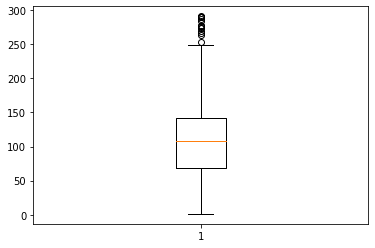

In [88]:
plt.boxplot(df5['DMC'])

In [89]:
df6=df5.drop(df5[df5['DMC']>250].index.values)

In [90]:
df6

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [95]:
df7=df6.drop(df5[df5['area']>=700].index.values)

In [151]:
x_train=df7.iloc[:-150,:28]
y_train=df7.iloc[:-150,-1]

In [152]:
x_test=df7.iloc[-150:,:28]
y_test=df7.iloc[-150:,-1]

In [181]:
clf1 = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.001, 0.01, 0.1, 1, 10, 100],'C':[0.001, 0.0001, 0.1, 1, 10, 100] }]
gsv = GridSearchCV(clf1,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.0001, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']}])

In [182]:
gsv.best_params_ , gsv.best_score_ 

({'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, 0.873529411764706)

In [178]:
clf1 = SVC(kernel='rbf',C=100, gamma = 0.0001)
clf1.fit(x_train , y_train)
y_pred = clf1.predict(x_train)

In [179]:
y_pred1 = clf1.predict(x_test)

In [180]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

       large       0.88      0.78      0.83        46
       small       0.91      0.95      0.93       104

    accuracy                           0.90       150
   macro avg       0.89      0.87      0.88       150
weighted avg       0.90      0.90      0.90       150

